In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random

In [2]:
payments = pd.read_csv('synthetical_payments.csv')

In [3]:
payments['transactionTime'] = pd.to_datetime(payments['transactionTime'],unit='s')
payments['day'] = payments['transactionTime'].dt.strftime('%Y-%m-%d')
payments['week'] = payments['transactionTime'].dt.strftime('%Y-%W')
payments['month'] = payments['transactionTime'].dt.strftime('%Y-%m')
payments.rename(columns={'amount':'discount_amount','billingCountry':'country','userId':'userid'}, inplace=True)
payments['discount_price'] = round(payments['discount_amount'] / payments['period'], 2)
payments['amount'] = payments['price'] * payments['period']
payments = payments[['userid', 'product', 'country', 'month', 'week', 'day', 'period', 'price', 'discount_price', 'amount', 'discount_amount']]
payments = payments[(payments['month'] <= '2017-12') & (payments['discount_amount'] != 30000)] 
#убираем неполные данные за январь 2018 и 2 выброса, где бизнес подписка стоит 30000
payments

,userid,product,country,month,week,day,period,price,discount_price,amount,discount_amount
0,41851,PRO,United States,2015-01,2015-00,2015-01-04,12,99.99,83.99,1199.88,1007.90
1,13575,PRO,India,2015-01,2015-00,2015-01-04,1,99.99,99.99,99.99,99.99
2,73971,PRO,India,2015-01,2015-01,2015-01-05,1,99.99,99.99,99.99,99.99
3,80119,GURU,United States,2015-01,2015-01,2015-01-11,12,199.99,167.99,2399.88,2015.90
4,90456,GURU,United States,2015-01,2015-01,2015-01-11,12,199.99,167.99,2399.88,2015.90
...,...,...,...,...,...,...,...,...,...,...,...
38492,19321,GURU,France,2017-12,2017-52,2017-12-31,1,199.99,159.99,199.99,159.99
38493,88092,PRO,France,2017-12,2017-52,2017-12-31,1,99.99,99.99,99.99,99.99
38494,11344,GURU,France,2017-12,2017-52,2017-12-31,1,199.99,199.99,199.99,199.99
38495,51297,GURU,France,2017-12,2017-52,2017-12-31,1,199.99,100.00,199.99,100.00


In [4]:
tab_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:cyan', 'tab:grey', 'tab:pink', 'tab:olive', 'tab:purple']
items = sorted(list(set(payments['product']))) + sorted(list(set(payments['country'])))
colors = {}
for key, value in zip(items, tab_colors):
    colors[key] = value
other_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(other_colors)

In [5]:
def draw_unstacked(pivot, name,reverse=False):
    #готовим данные
    x = pivot.iloc[:,0]
    y = []
    columns = sorted(pivot.columns[1:],reverse=reverse)
    
    for column in columns:    
        y.append(pivot[column].values)
    
    #строим unstacked
    fig, ax = plt.subplots(1, 1, figsize=(16,9))
    for i in range(1, len(columns)+1):
        ax.fill_between(x, y1=y[-i], y2=0, label=columns[-i], alpha=0.5, color=colors.get(columns[-i], other_colors[-i+1]), linewidth=2)

    plt.grid(axis='both', alpha=.2)

    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.3)

    plt.legend(loc='upper left')
    plt.title(name, fontsize=16) 
    plt.xlim(-1, 35)
    plt.xticks(x[1::2], fontsize=10, horizontalalignment='center')
    plt.show()

In [6]:
def draw_simple_line(df, name,shift=0):

    plt.figure(figsize=(16, 9))

    x = df.iloc[:,0].values.tolist()
    y = df.iloc[:,1].values.tolist()
    plt.plot(x, y, linewidth=1.5)

    plt.grid(axis='both', alpha=.2)

    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.3)

    plt.title(name, fontsize=16) 
    plt.xticks(x[1+shift::2], fontsize=10, horizontalalignment='center')
    plt.xlim(-1, 35)
    plt.show()

In [7]:
def draw_line_text(pivot, name, shift=0):
    fig, ax = plt.subplots(1,1,figsize=(16, 9))
    x = pivot.iloc[:,0].values
    columns = sorted(pivot.columns[1:])
    for i, column in enumerate(columns):   
        plt.plot(x, pivot[column].values, lw=1.5, color=colors.get(column, other_colors[-i]))    
        plt.text(pivot.shape[0]-1, pivot[columns[i]].values[-1], column, fontsize=14, color=colors.get(column, other_colors[-i]))

    plt.grid(axis='both', alpha=.2)

    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.3)

    plt.title(name, fontsize=16)
    plt.xticks(x[1+shift::2], fontsize=10, horizontalalignment='center')    
    plt.xlim(-1, 37)    
    plt.show()

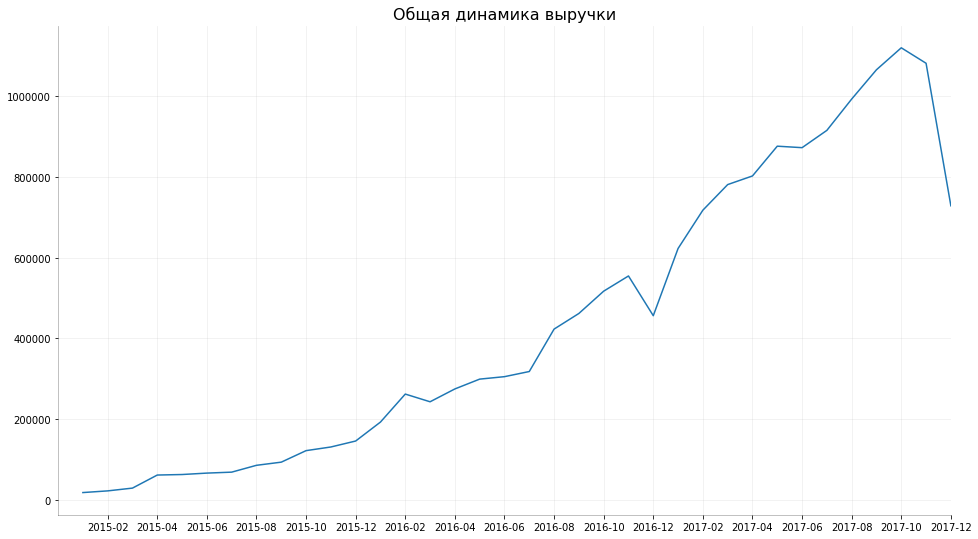

In [8]:
total_revenue = payments.groupby(['month']).agg({'discount_amount':'sum'}).reset_index()
draw_simple_line(df=total_revenue,
                 name='Общая динамика выручки')

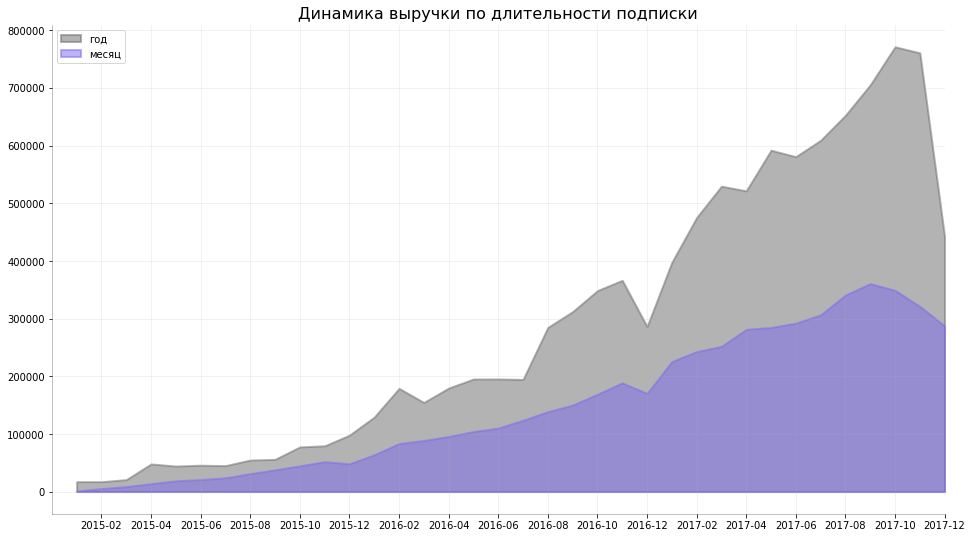

In [9]:
revenue_by_period = payments.groupby(['month', 'period']).agg({'discount_amount':'sum'}).reset_index()
revenue_by_period.rename(columns={'discount_amount':'revenue'}, inplace=True)
revenue_by_period = revenue_by_period.pivot(index="month", 
                                            columns="period", 
                                            values="revenue").fillna(0).reset_index()
revenue_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_unstacked(pivot=revenue_by_period,
               reverse=True,
               name='Динамика выручки по длительности подписки')

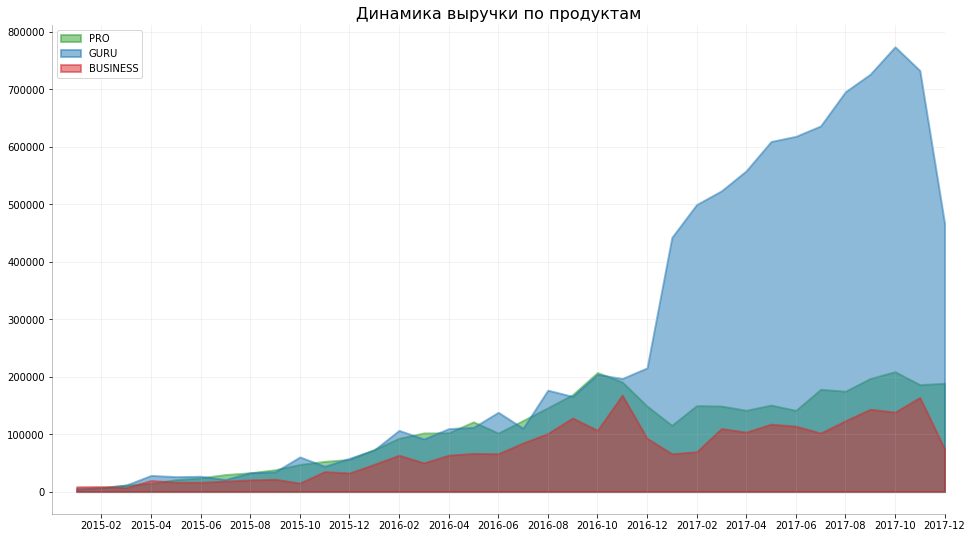

In [10]:
revenue_by_product = payments.groupby(['month', 'product']).agg({'discount_amount':'sum'}).reset_index()
revenue_by_product.rename(columns={'discount_amount':'revenue'}, inplace=True)
revenue_by_product = revenue_by_product.pivot(index="month", 
                                              columns="product", 
                                              values="revenue").fillna(0).reset_index()
draw_unstacked(pivot=revenue_by_product,
               name='Динамика выручки по продуктам')

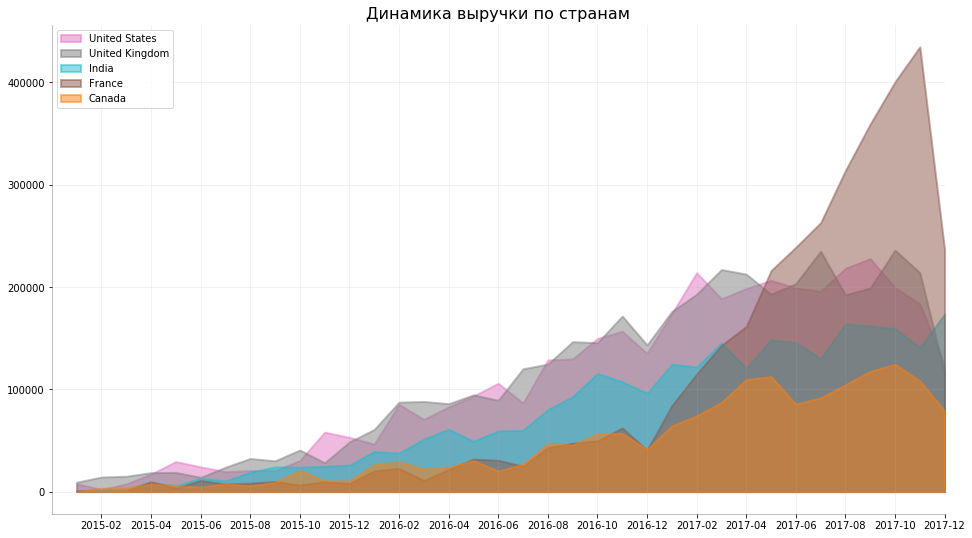

In [11]:
revenue_by_country = payments.groupby(['month','country']).agg({'discount_amount':'sum'}).reset_index()
revenue_by_country.rename(columns={'discount_amount':'revenue'}, inplace=True)
revenue_by_country = revenue_by_country.pivot(index="month", 
                                              columns="country", 
                                              values="revenue").fillna(0).reset_index()
draw_unstacked(pivot=revenue_by_country,
               name='Динамика выручки по странам')

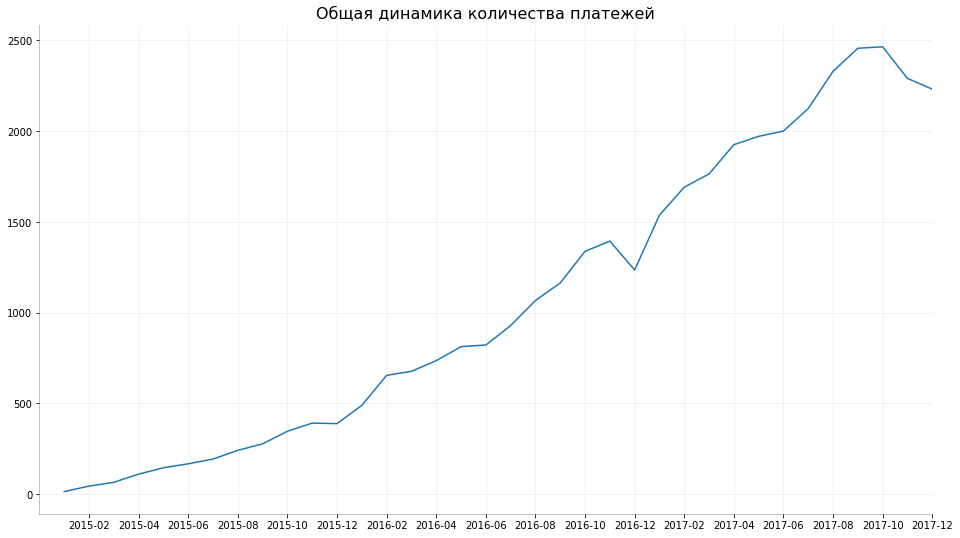

In [12]:
total_payments = payments.groupby(['month']).agg({'userid':'count'}).reset_index()
draw_simple_line(df=total_payments,
                 name='Общая динамика количества платежей')

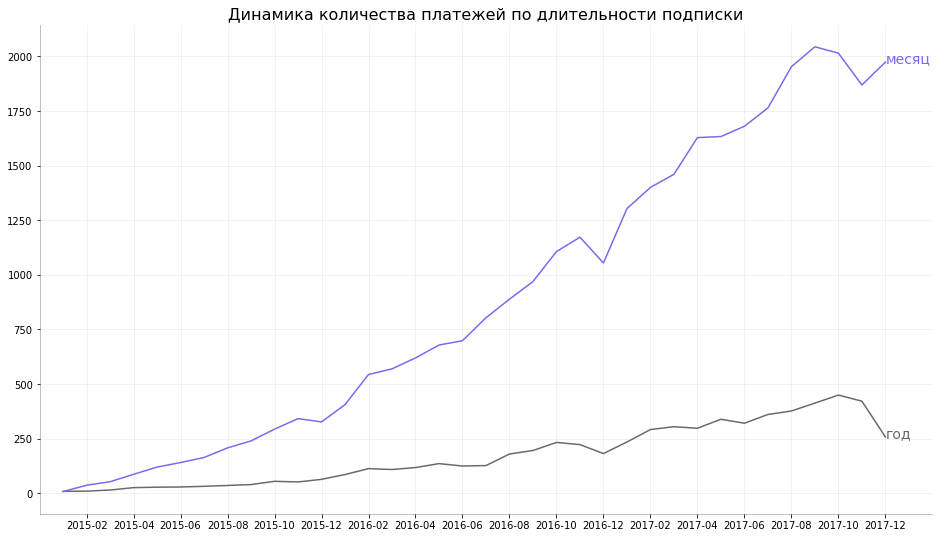

In [13]:
payments_by_period = payments.groupby(['month', 'period']).agg({'userid':'count'}).reset_index()
payments_by_period.rename(columns={'userid':'payments'}, inplace=True)
payments_by_period = payments_by_period.pivot(index="month", 
                                              columns="period", 
                                              values="payments").fillna(0).reset_index()
payments_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_line_text(pivot=payments_by_period,
               #shift=1,
               name='Динамика количества платежей по длительности подписки')

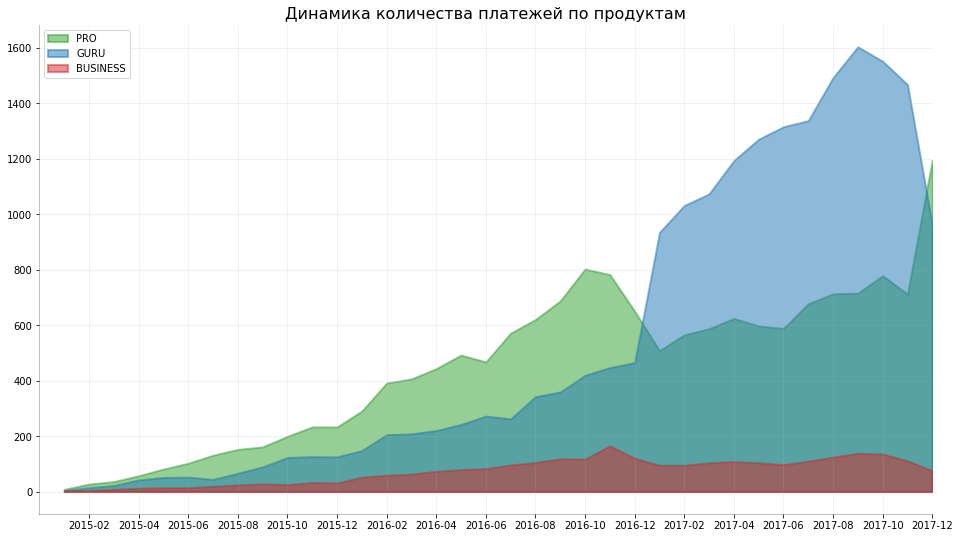

In [14]:
paymnets_by_product = payments.groupby(['month', 'product']).agg({'userid':'count'}).reset_index()
paymnets_by_product.rename(columns={'userid':'payments'}, inplace=True)
paymnets_by_product = paymnets_by_product.pivot(index="month", 
                                                columns="product", 
                                                values="payments").fillna(0).reset_index()
draw_unstacked(pivot=paymnets_by_product,
               name='Динамика количества платежей по продуктам')

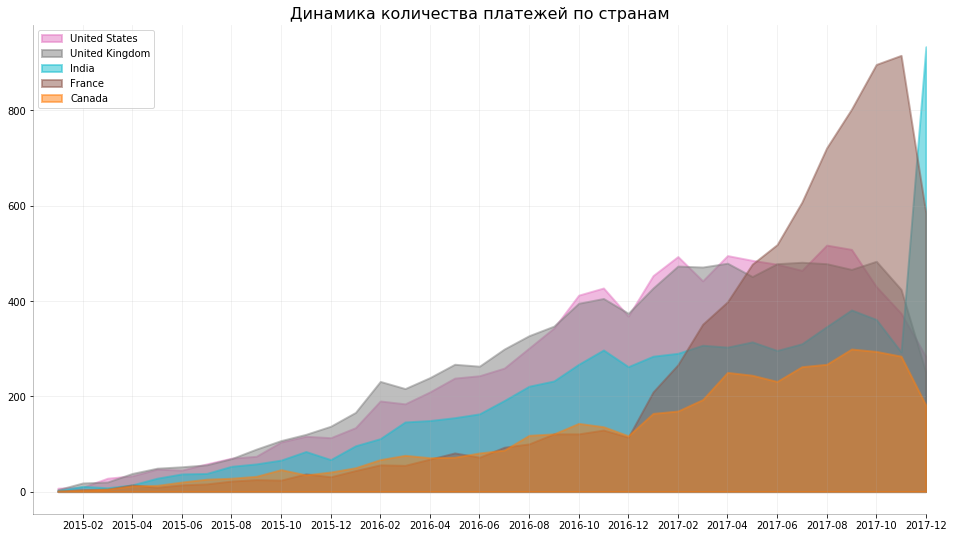

In [15]:
paymnets_by_country = payments.groupby(['month', 'country']).agg({'userid':'count'}).reset_index()
paymnets_by_country.rename(columns={'userid':'payments'}, inplace=True)
paymnets_by_country = paymnets_by_country.pivot(index="month", 
                                                columns="country", 
                                                values="payments").fillna(0).reset_index()
draw_unstacked(pivot=paymnets_by_country,
               name='Динамика количества платежей по странам')

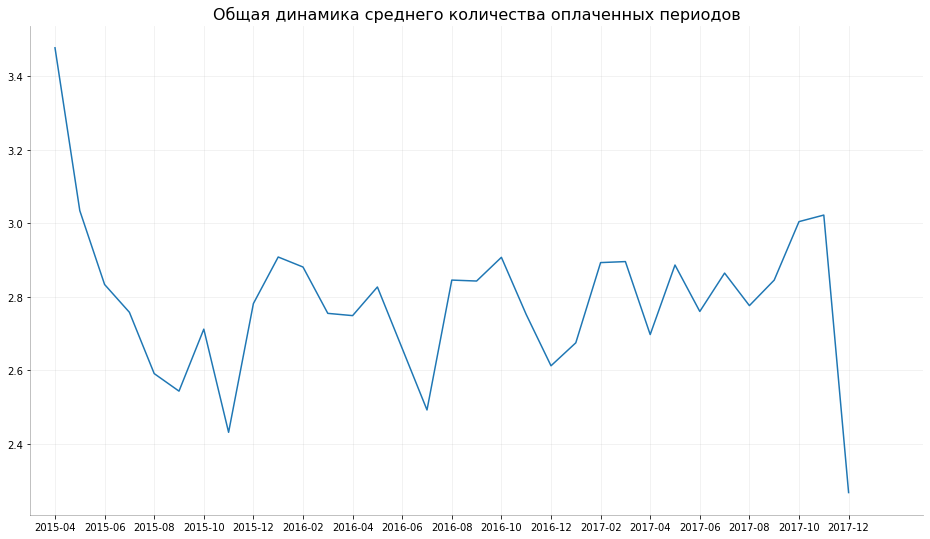

In [16]:
avg_periods = payments.groupby(['month']).agg({'period':'mean'}).reset_index()
draw_simple_line(df=avg_periods.drop(index=[0,1,2]),
                 shift=-1,
                 name='Общая динамика среднего количества оплаченных периодов')

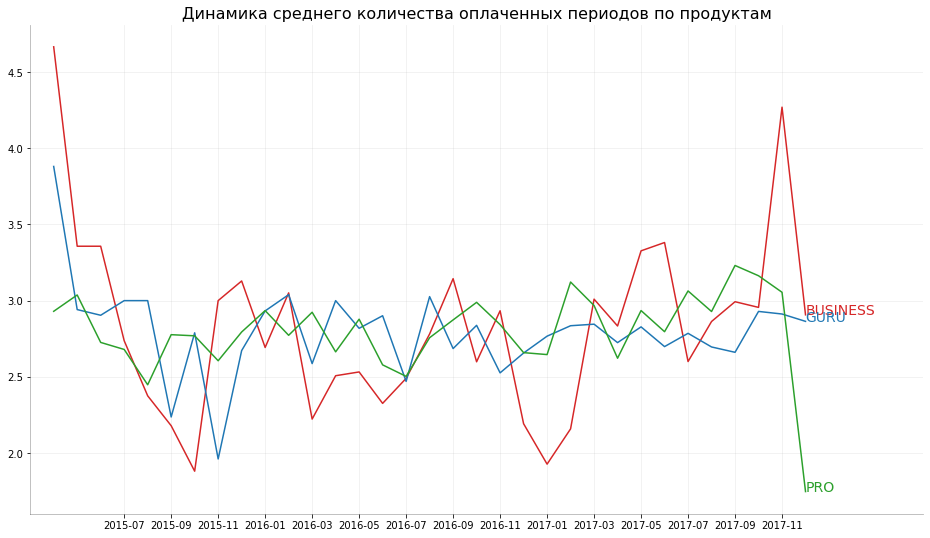

In [17]:
periods_by_product = payments.groupby(['month', 'product']).agg({'period':'mean'}).reset_index()
periods_by_product.rename(columns={'period':'avg_periods'}, inplace=True)
periods_by_product = periods_by_product.pivot(index="month", 
                                          columns="product", 
                                          values="avg_periods").fillna(0).reset_index()
draw_line_text(pivot=periods_by_product.drop(index=[0,1,2]),
               shift=2,
               name='Динамика среднего количества оплаченных периодов по продуктам')

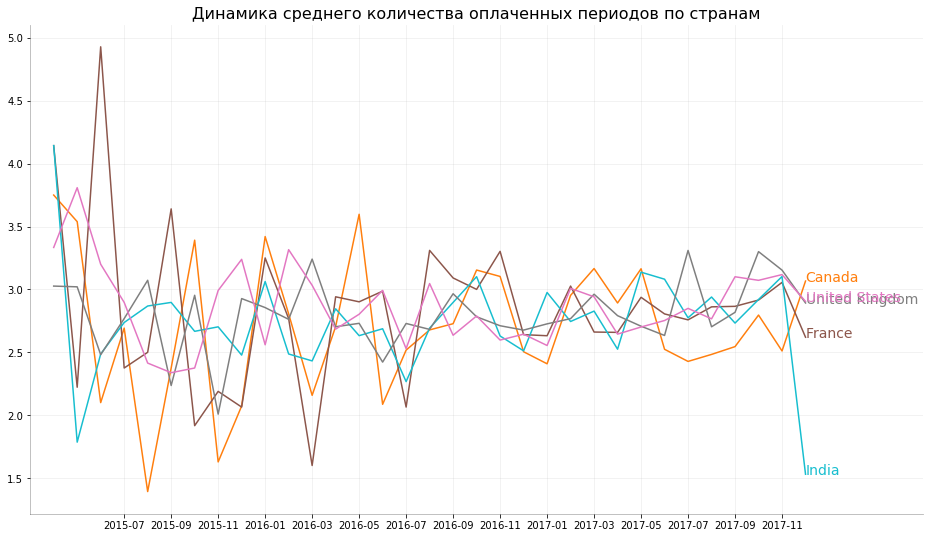

In [18]:
periods_by_country = payments.groupby(['month', 'country']).agg({'period':'mean'}).reset_index()
periods_by_country.rename(columns={'period':'avg_periods'}, inplace=True)
periods_by_country = periods_by_country.pivot(index="month", 
                                          columns="country", 
                                          values="avg_periods").fillna(0).reset_index()
draw_line_text(pivot=periods_by_country.drop(index=[0,1,2]),
               shift=2,
               name='Динамика среднего количества оплаченных периодов по странам')

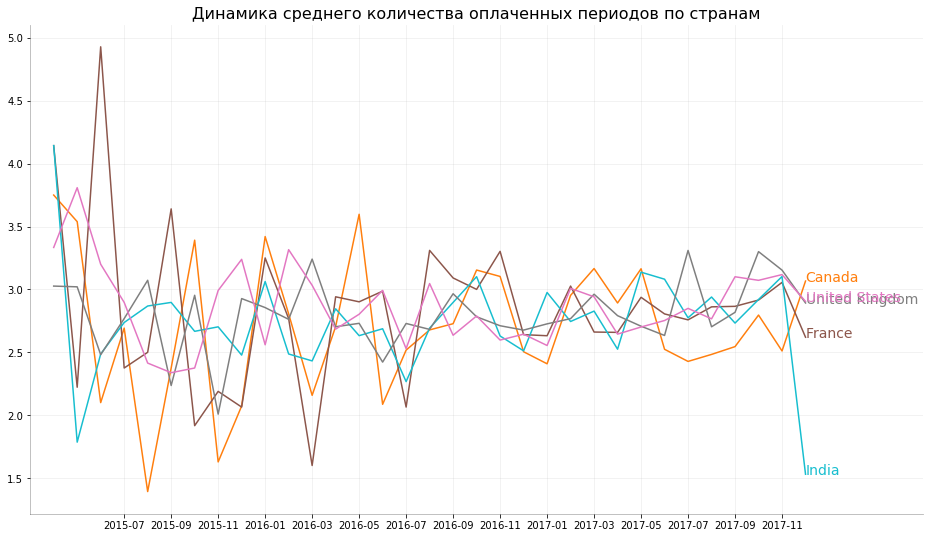

In [19]:
periods_by_country = payments.groupby(['month', 'country']).agg({'period':'mean'}).reset_index()
periods_by_country.rename(columns={'period':'avg_periods'}, inplace=True)
periods_by_country = periods_by_country.pivot(index="month", 
                                          columns="country", 
                                          values="avg_periods").fillna(0).reset_index()
draw_line_text(pivot=periods_by_country.drop(index=[0,1,2]),
               shift=2,
               name='Динамика среднего количества оплаченных периодов по странам')

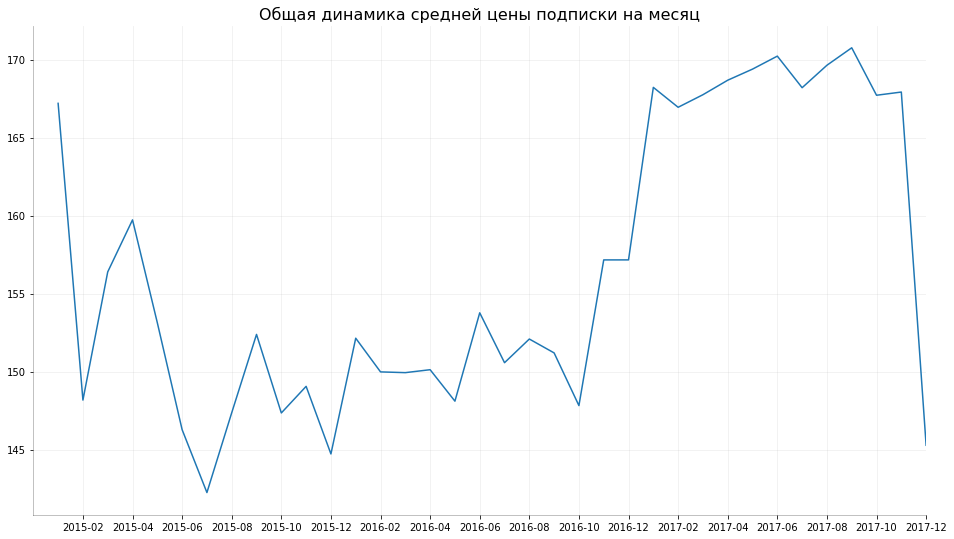

In [20]:
avg_price = payments.groupby(['month']).agg({'discount_price':'mean'}).reset_index()
draw_simple_line(df=avg_price,
                 name='Общая динамика средней цены подписки на месяц')

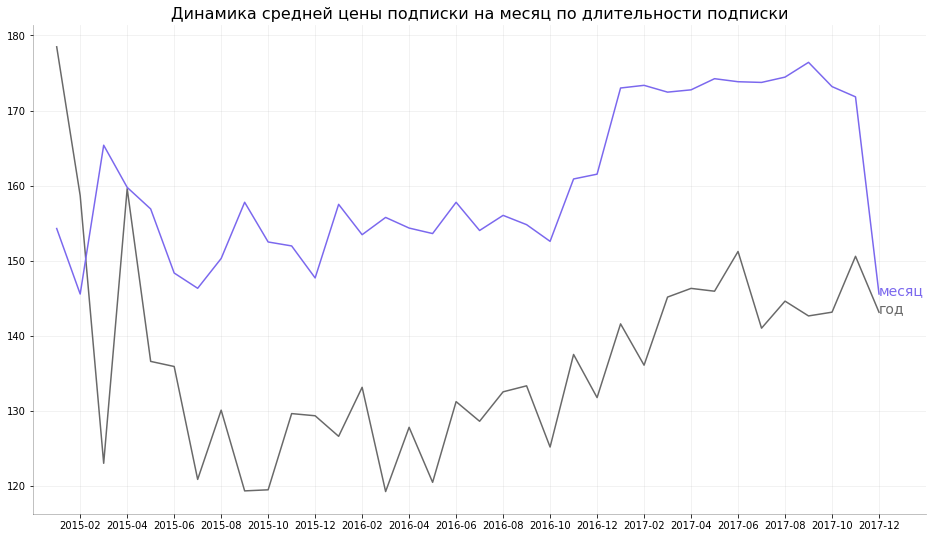

In [21]:
price_by_period = payments.groupby(['month', 'period']).agg({'discount_price':'mean'}).reset_index()
price_by_period.rename(columns={'discount_price':'avg_price'}, inplace=True)
price_by_period = price_by_period.pivot(index="month", 
                                        columns="period", 
                                        values="avg_price").fillna(0).reset_index()
price_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_line_text(pivot=price_by_period,
               name='Динамика средней цены подписки на месяц по длительности подписки')

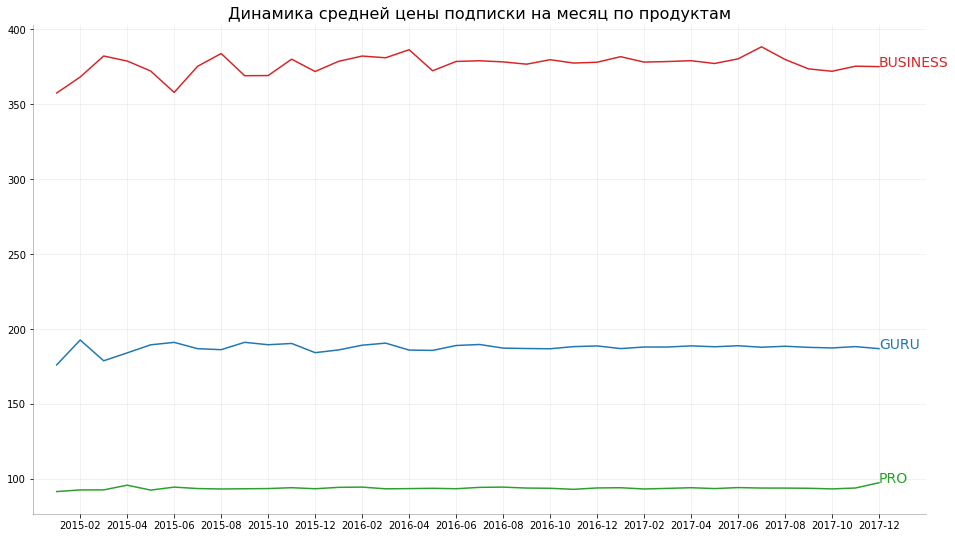

In [22]:
price_by_product = payments.groupby(['month', 'product']).agg({'discount_price':'mean'}).reset_index()
price_by_product.rename(columns={'discount_price':'avg_price'}, inplace=True)
price_by_product = price_by_product.pivot(index="month", 
                                          columns="product", 
                                          values="avg_price").fillna(0).reset_index()
draw_line_text(pivot=price_by_product,
               name='Динамика средней цены подписки на месяц по продуктам')

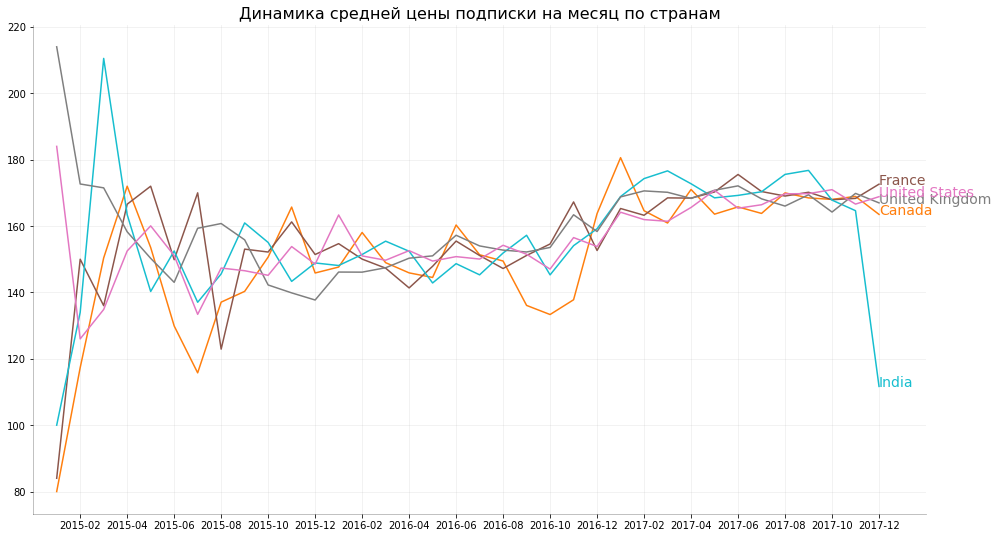

In [23]:
price_by_country = payments.groupby(['month', 'country']).agg({'discount_price':'mean'}).reset_index()
price_by_country.rename(columns={'discount_price':'avg_price'}, inplace=True)
price_by_country = price_by_country.pivot(index="month", 
                                          columns="country", 
                                          values="avg_price").fillna(0).reset_index()
draw_line_text(pivot=price_by_country,
               name='Динамика средней цены подписки на месяц по странам')

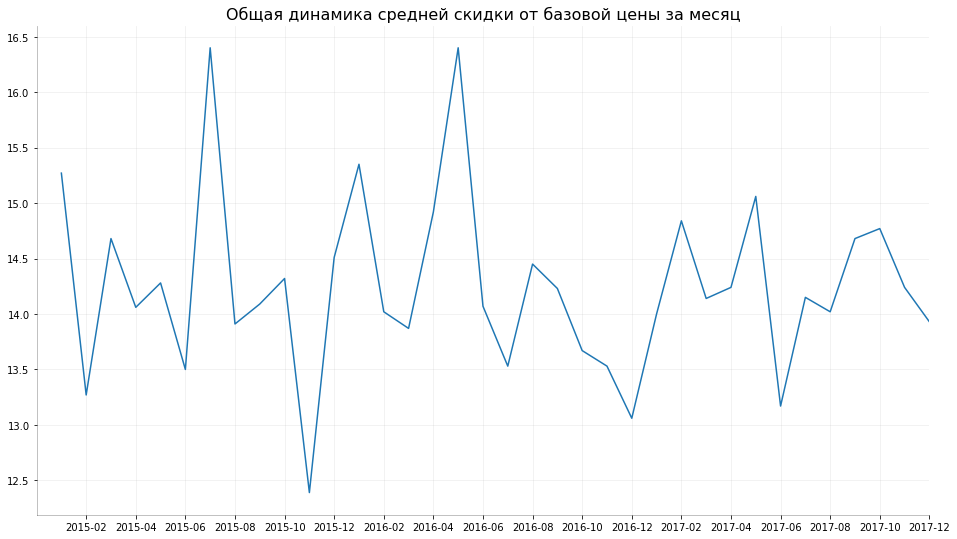

In [24]:
avg_discount = payments.groupby(['month']).agg({'amount':'sum', 'discount_amount':'sum'}).reset_index()
avg_discount['discount'] = round((1 - avg_discount['discount_amount'] / avg_discount['amount']) * 100, 2)
avg_discount = avg_discount[['month', 'discount']]
draw_simple_line(df=avg_discount,
                 name='Общая динамика средней скидки от базовой цены за месяц')

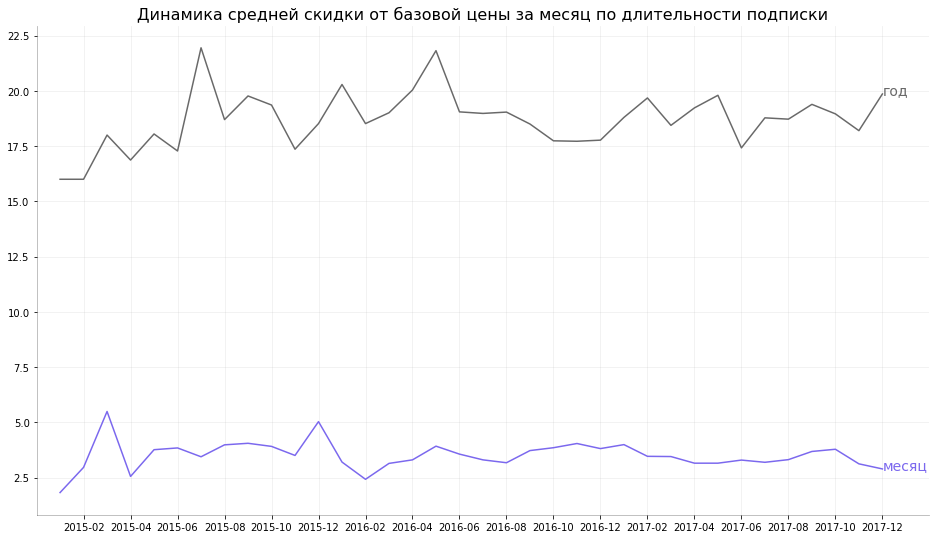

In [25]:
discount_by_period = payments.groupby(['month', 'period']).agg({'amount':'sum', 'discount_amount':'sum'}).reset_index()
discount_by_period['discount'] = round((1 - discount_by_period['discount_amount'] / discount_by_period['amount']) * 100, 2)
discount_by_period = discount_by_period.pivot(index="month", 
                                              columns="period", 
                                              values="discount").fillna(0).reset_index()
discount_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_line_text(pivot=discount_by_period,
               name='Динамика средней скидки от базовой цены за месяц по длительности подписки')

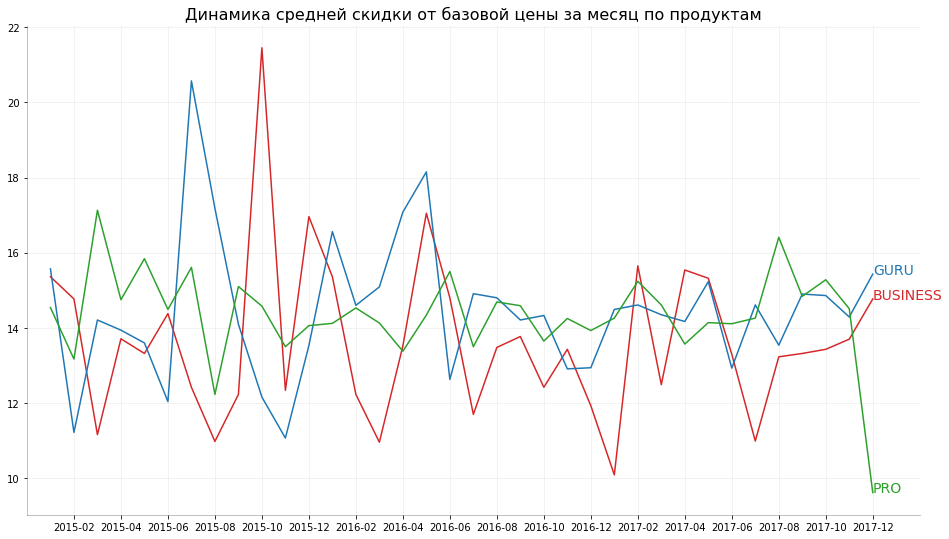

In [26]:
discount_by_product = payments.groupby(['month', 'product']).agg({'amount':'sum', 'discount_amount':'sum'}).reset_index()
discount_by_product['discount'] = round((1 - discount_by_product['discount_amount'] / discount_by_product['amount']) * 100, 2)
discount_by_product = discount_by_product.pivot(index="month", 
                                                columns="product", 
                                                values="discount").fillna(0).reset_index()
draw_line_text(pivot=discount_by_product,
               name='Динамика средней скидки от базовой цены за месяц по продуктам')

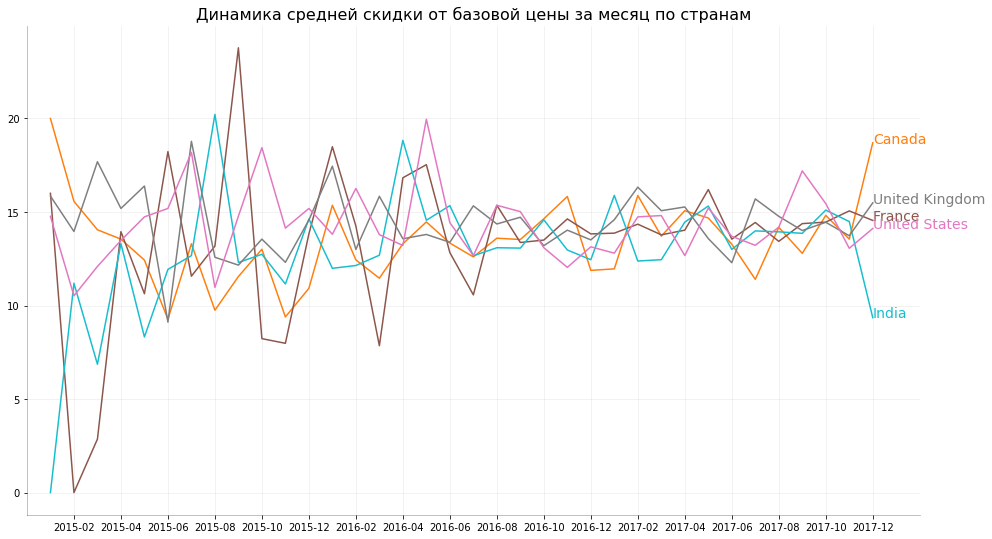

In [27]:
discount_by_country = payments.groupby(['month', 'country']).agg({'amount':'sum', 'discount_amount':'sum'}).reset_index()
discount_by_country['discount'] = round((1 - discount_by_country['discount_amount'] / discount_by_country['amount']) * 100, 2)
discount_by_country = discount_by_country.pivot(index="month", 
                                                columns="country", 
                                                values="discount").fillna(0).reset_index()
draw_line_text(pivot=discount_by_country,
               name='Динамика средней скидки от базовой цены за месяц по странам')

In [28]:
from sqlalchemy import create_engine
from db_secret import db_secret

engine_path = f"""\
postgresql://\
{db_secret['db_user']}:\
{db_secret['db_password']}@\
{db_secret['db_host']}:\
{db_secret['db_port']}/\
{db_secret['db_name']}\
"""
engine = create_engine(engine_path)

In [31]:
query1 = '''
with time_data
as (
    select userid
        , billingcountry as country
        , product
        , period
        , date_trunc('day', to_timestamp(transactiontime))::date as first_day
        , (case when period = 12 then date_trunc('day', to_timestamp(transactiontime))
                                                + interval '1 year' - interval '1 day'
                when period = 1  then date_trunc('day', to_timestamp(transactiontime))
                                                + interval '1 month' - interval '1 day'
           end)::date as last_day
    from synthetical_payments_csv spc
    where to_timestamp(transactiontime) < '2018-01-01'
    )
, all_dates
as (
    select generate_series((select min(first_day) from time_data),
                           (select max(first_day) from time_data),
                            interval '1 day')::date as servicedate
    )
, user_dates
as(
    select userid
        , country
        , product
        , period
        , ad.servicedate
    from time_data td
    inner join all_dates ad
        on ad.servicedate >= td.first_day
        and ad.servicedate <= last_day
   )
select *
    , case when row_number() over (partition by userid order by servicedate) = 1 then 1
           else 0
      end as new_customer 
    , case when row_number() over (partition by userid, product order by servicedate) = 1 then 1
           else 0
      end as new_product_customer
    , case when row_number() over (partition by userid, period order by servicedate) = 1 then 1
           else 0
      end as new_period_customer
from user_dates
'''

data = pd.read_sql(query1, engine)

data['servicedate'] = pd.to_datetime(data['servicedate'])
data['month'] = data.servicedate.dt.strftime('%Y-%m')

data.head()

,userid,country,product,period,servicedate,new_customer,new_product_customer,new_period_customer,month
0,2,United States,GURU,12,2016-02-22,1,1,1,2016-02
1,2,United States,GURU,12,2016-02-23,0,0,0,2016-02
2,2,United States,GURU,12,2016-02-24,0,0,0,2016-02
3,2,United States,GURU,12,2016-02-25,0,0,0,2016-02
4,2,United States,GURU,12,2016-02-26,0,0,0,2016-02


In [32]:
query2 = '''
with time_data
as (
    select *
        , to_timestamp(transactiontime) as dttm
    from synthetical_payments_csv spc
    where to_timestamp(transactiontime) < '2018-01-01'
    )
select dttm
    , userid 
    , billingcountry as country
    , product 
    , case when lag(price) over (partition by userid order by dttm) > price then 'PR▼'
           when lag(price) over (partition by userid order by dttm) = price then 'PR—'
           when lag(price) over (partition by userid order by dttm) < price then 'PR▲'
      end as product_shift
    , case when lag(period) over (partition by userid order by dttm) > period then 'PE▼'  
           when lag(period) over (partition by userid order by dttm) = period then 'PE—'
           when lag(period) over (partition by userid order by dttm) < period then 'PE▲'
      end as period_shift  
from time_data
'''

shifts = pd.read_sql(query2, engine)

shifts['dttm'] = pd.to_datetime(shifts['dttm'])
shifts['month'] = shifts.dttm.dt.strftime('%Y-%m')

shifts.tail()

,dttm,userid,country,product,product_shift,period_shift,month
38491,2017-12-25 01:11:46+00:00,210873,India,PRO,None,None,2017-12
38492,2017-12-25 01:04:32+00:00,210891,India,PRO,None,None,2017-12
38493,2017-12-25 01:10:37+00:00,210986,India,PRO,None,None,2017-12
38494,2016-12-15 00:00:00+00:00,123321121,United States,BUSINESS,None,None,2016-12
38495,2017-12-25 01:01:01+00:00,123321121,United States,BUSINESS,PR—,PE—,2017-12


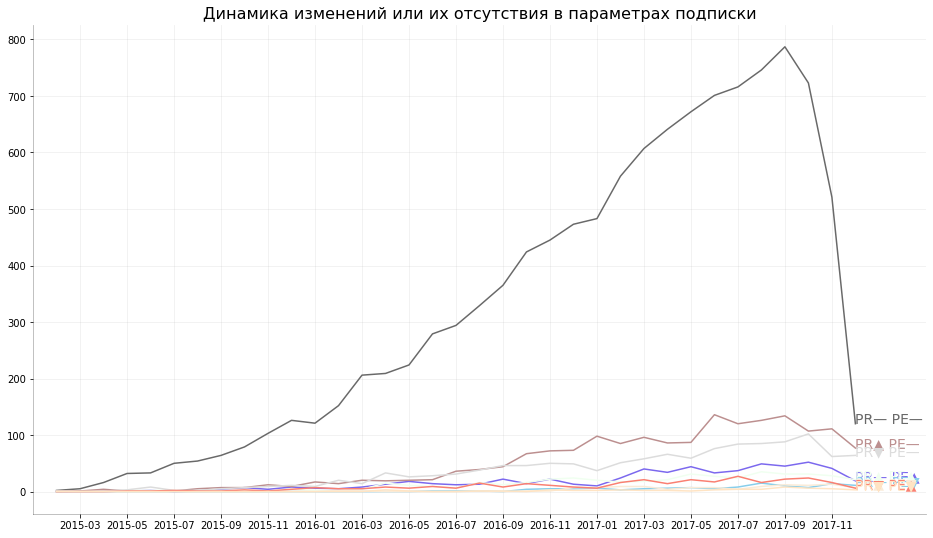

In [33]:
shifts['shift'] = shifts['product_shift'] + ' ' + shifts['period_shift']
total_shifts = shifts.groupby(['month', 'shift']).agg({'userid':'nunique'}).reset_index()
total_shifts.rename(columns={'userid':'customers'}, inplace=True)
total_shifts_pivot = total_shifts.pivot(index="month", 
                                  columns="shift", 
                                  values="customers").fillna(0).reset_index()
draw_line_text(total_shifts_pivot,
               name='Динамика изменений или их отсутствия в параметрах подписки')

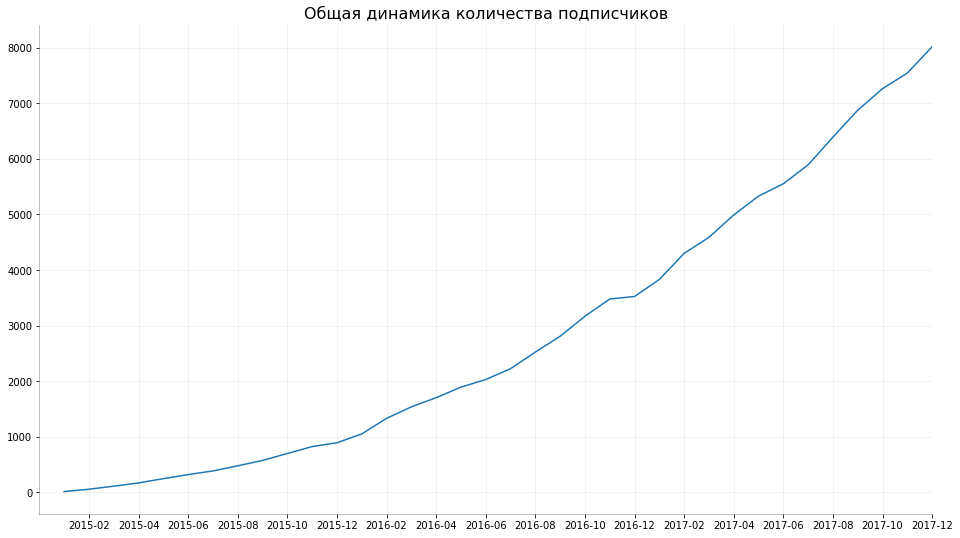

In [34]:
total_users = data.groupby(['month']).agg({'userid':'nunique'}).reset_index()
draw_simple_line(df=total_users,
                 name='Общая динамика количества подписчиков')

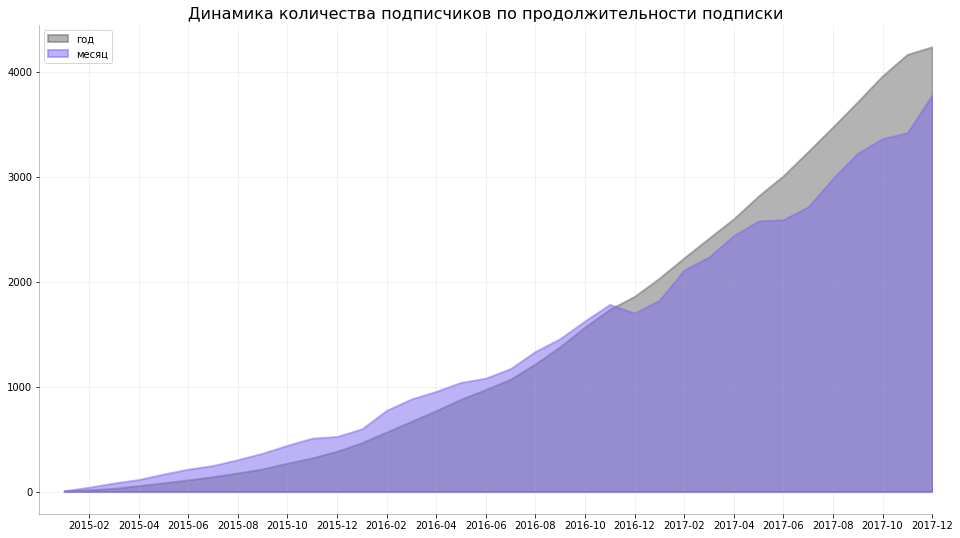

In [35]:
users_by_period = data.groupby(['month', 'period']).agg({'userid':'nunique'}).reset_index()
users_by_period.rename(columns={'userid':'customers'}, inplace=True)
users_by_period = users_by_period.pivot(index="month", 
                                        columns="period", 
                                        values="customers").fillna(0).reset_index()
users_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_unstacked(pivot=users_by_period,
               reverse=True,
               name='Динамика количества подписчиков по продолжительности подписки')

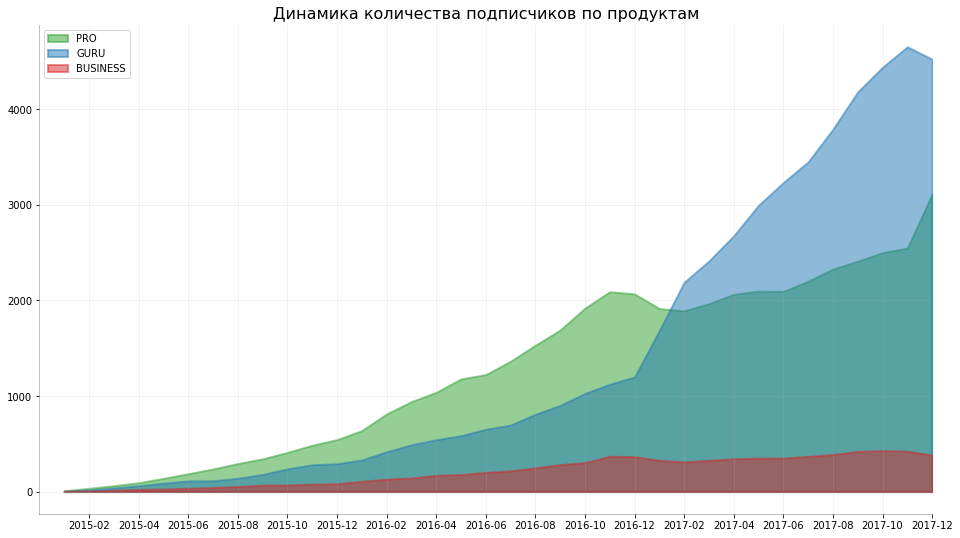

In [36]:
users_by_product = data.groupby(['month', 'product']).agg({'userid':'nunique'}).reset_index()
users_by_product.rename(columns={'userid':'customers'}, inplace=True)
users_by_product = users_by_product.pivot(index="month", 
                                          columns="product", 
                                          values="customers").fillna(0).reset_index()
draw_unstacked(pivot=users_by_product,
               name='Динамика количества подписчиков по продуктам')

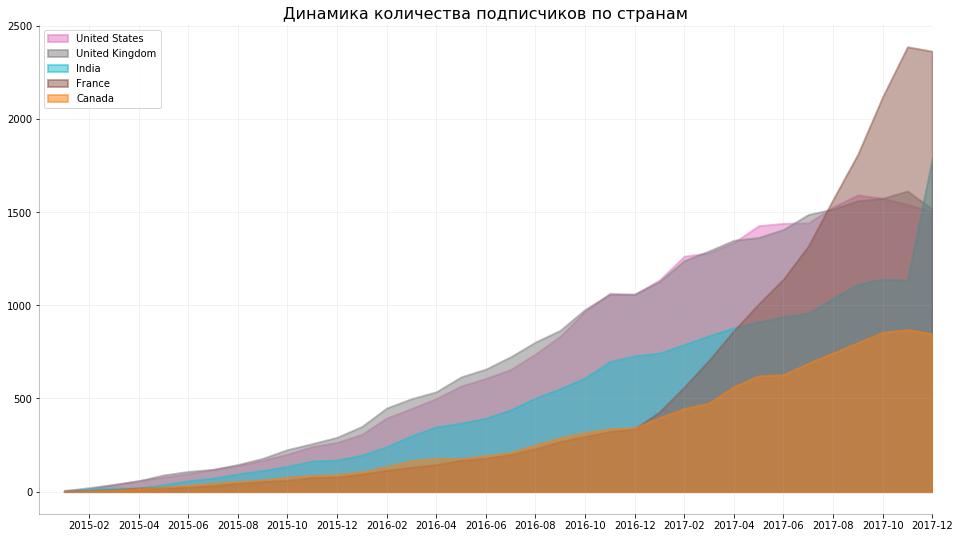

In [37]:
users_by_country = data.groupby(['month', 'country']).agg({'userid':'nunique'}).reset_index()
users_by_country.rename(columns={'userid':'customers'}, inplace=True)
users_by_country = users_by_country.pivot(index="month", 
                                          columns="country", 
                                          values="customers").fillna(0).reset_index()
draw_unstacked(pivot=users_by_country,
               name='Динамика количества подписчиков по странам')

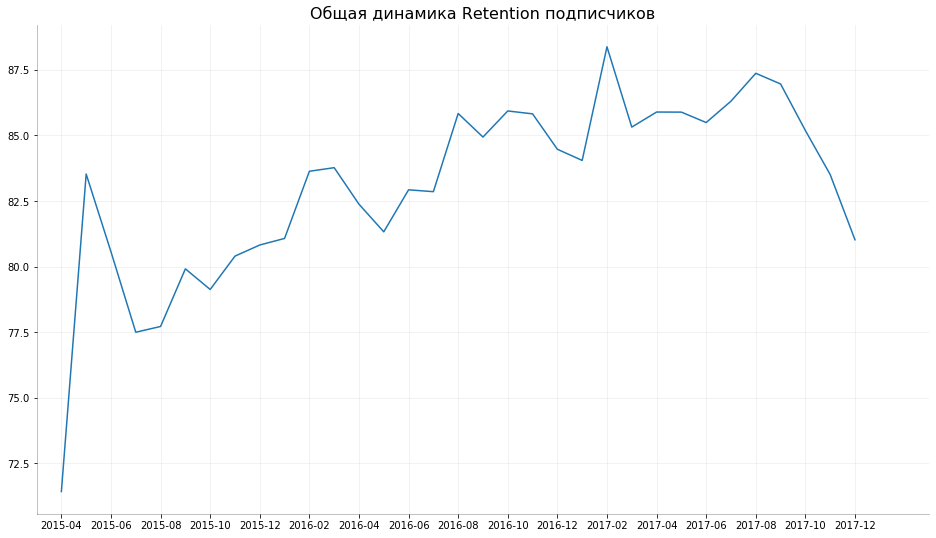

In [38]:
users_retention = data.groupby('month').agg({'userid':'nunique','new_customer':'sum'}).reset_index()
users_retention.columns = ['month', 'total_customers','new_customers']
users_retention['old_customers'] = users_retention['total_customers'] - users_retention['new_customers']
users_retention['retention'] = users_retention['old_customers'] / users_retention['total_customers'].shift(1) * 100
draw_simple_line(df=users_retention[['month','retention']].drop(index=[0,1,2]),
                 shift=-1,
                 name='Общая динамика Retention подписчиков')

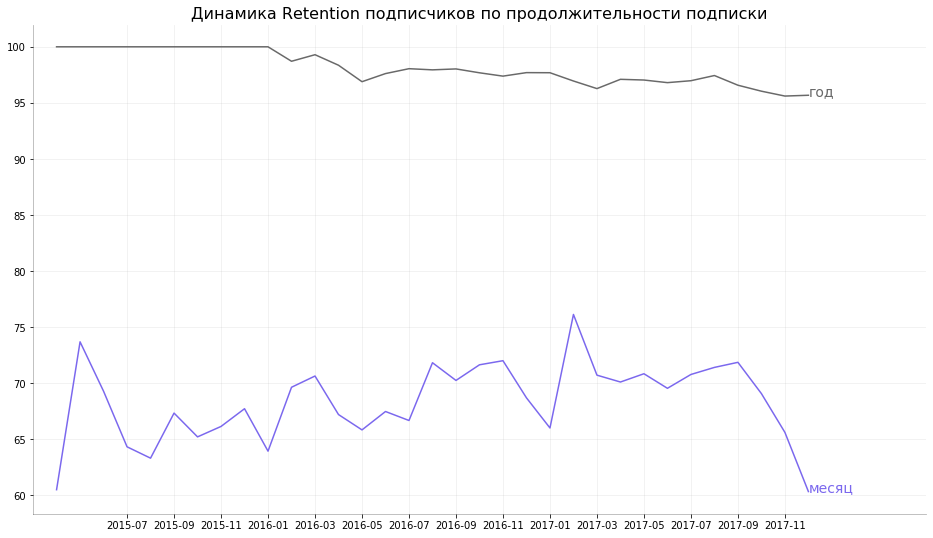

In [39]:
period_retention = data.groupby(['month', 'period']).agg({'userid':'nunique','new_period_customer':'sum'}).reset_index()
period_retention.rename(columns={'userid': 'total_customers', 'new_period_customer':'new_customers'}, inplace=True)
period_retention['old_customers'] = period_retention['total_customers'] - period_retention['new_customers']
period_retention['retention'] = period_retention['old_customers'] / period_retention['total_customers'].shift(2) * 100
period_retention_pivot = period_retention[['month', 'period', 'retention']].pivot(index="month", 
                                                                               columns="period", 
                                                                               values="retention").fillna(0).reset_index()

period_retention_pivot.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_line_text(pivot=period_retention_pivot.drop(index=[0,1,2]),
               shift=2,
               name='Динамика Retention подписчиков по продолжительности подписки')

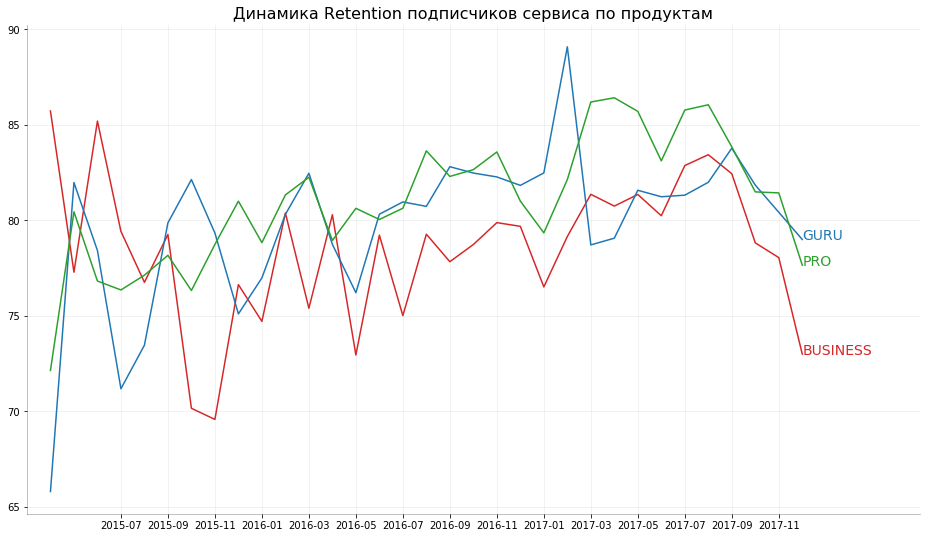

In [40]:
product_retention = data.groupby(['month', 'product']).agg({'userid':'nunique','new_product_customer':'sum'}).reset_index()
product_retention.rename(columns={'userid': 'total_customers', 'new_product_customer':'new_customers'}, inplace=True)
product_retention['old_customers'] = product_retention['total_customers'] - product_retention['new_customers']
product_retention['retention'] = product_retention['old_customers'] / product_retention['total_customers'].shift(3) * 100
product_retention_pivot = product_retention[['month', 'product', 'retention']].pivot(index="month", 
                                                                               columns="product", 
                                                                               values="retention").fillna(0).reset_index()
draw_line_text(pivot=product_retention_pivot.drop(index=[0,1,2]),
               shift=2,
               name='Динамика Retention подписчиков сервиса по продуктам')

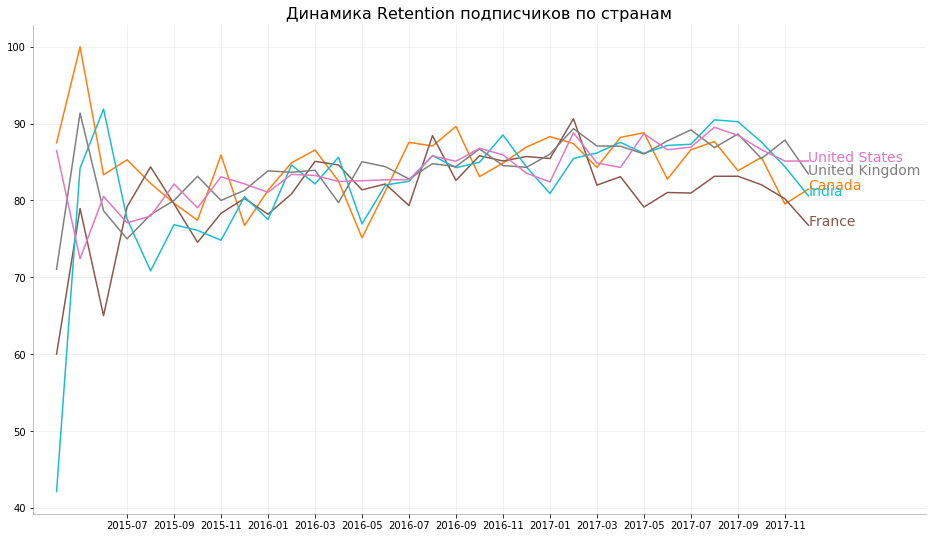

In [41]:
country_retention = data.groupby(['month', 'country']).agg({'userid':'nunique','new_customer':'sum'}).reset_index()
country_retention.rename(columns={'userid': 'total_customers', 'new_customer':'new_customers'}, inplace=True)
country_retention['old_customers'] = country_retention['total_customers'] - country_retention['new_customers']
country_retention['retention'] = country_retention['old_customers'] / country_retention['total_customers'].shift(5) * 100
country_retention_pivot = country_retention[['month', 'country', 'retention']].pivot(index="month", 
                                                                               columns="country", 
                                                                               values="retention").fillna(0).reset_index()
draw_line_text(pivot=country_retention_pivot.drop(index=[0,1,2]),
               shift=2,
               name='Динамика Retention подписчиков по странам')

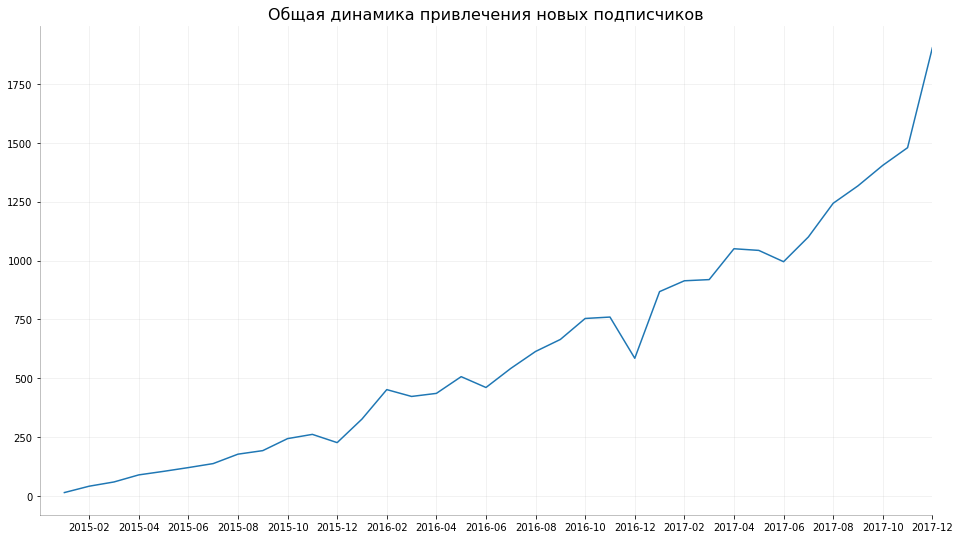

In [42]:
new_customers = country_retention.groupby(['month']).agg({'new_customers':'sum'}).reset_index()
draw_simple_line(df=new_customers,
                 name='Общая динамика привлечения новых подписчиков')

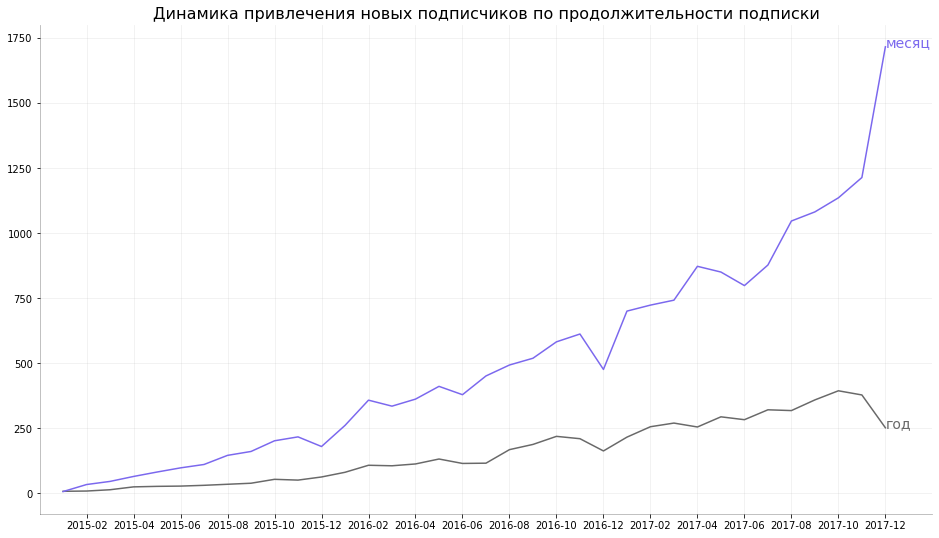

In [43]:
new_customers_by_period = period_retention.pivot(index="month", 
                                                 columns="period", 
                                                 values="new_customers").fillna(0).reset_index()
new_customers_by_period.rename(columns={1:'месяц',12:'год'}, inplace=True)
draw_line_text(pivot=new_customers_by_period,
               name='Динамика привлечения новых подписчиков по продолжительности подписки')

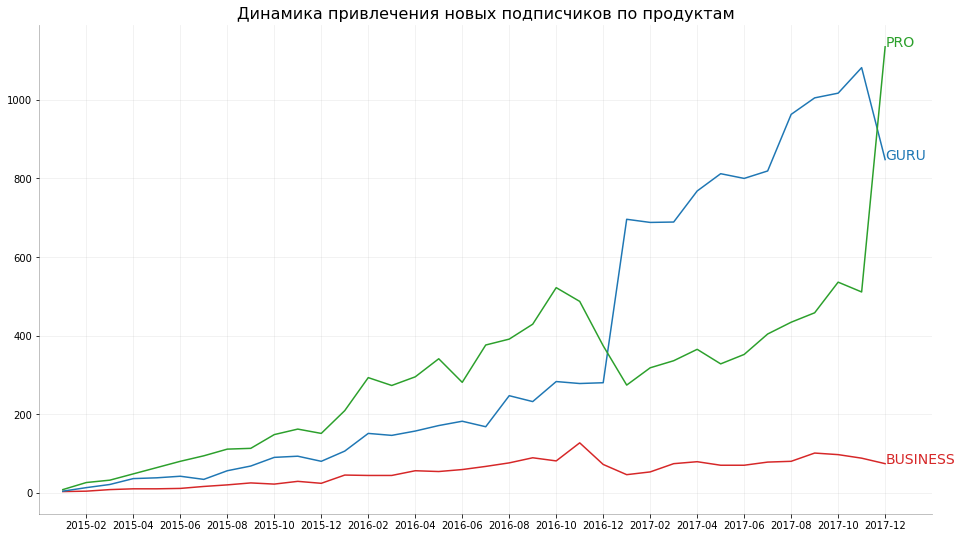

In [45]:
new_customers_by_product = product_retention.pivot(index="month", 
                                                   columns="product", 
                                                   values="new_customers").fillna(0).reset_index()
draw_line_text(pivot=new_customers_by_product,
               name='Динамика привлечения новых подписчиков по продуктам')

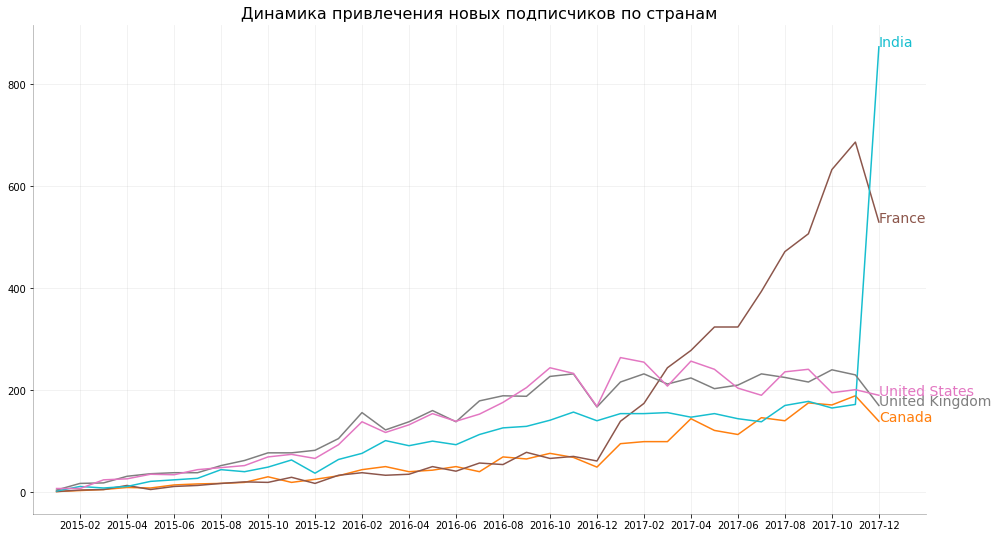

In [46]:
new_customers_by_country = country_retention.pivot(index="month", 
                                                   columns="country", 
                                                   values="new_customers").fillna(0).reset_index()
draw_line_text(pivot=new_customers_by_country,
               name='Динамика привлечения новых подписчиков по странам')